<a href="https://colab.research.google.com/github/anapaaula/regressao-multipla-desempenho-academico/blob/main/Regress%C3%A3o_M%C3%BAltipla_para_previs%C3%A3o_de_Desempenho_Acad%C3%AAmico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Múltipla para previsão de Desempenho Acadêmico

##Importanto Bibliotecas

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder

In [53]:
sns.set_theme(style='darkgrid')
sns.set_context(rc={"patch.force_edgecolor": False, "patch.alpha": 0.1})
import matplotlib.ticker as ticker

## Importanto os dados

*   Os dados utilizados nesse projeto são referentes ao desempenho acadêmico de estudantes. O dataset está disponível nesse [link](https://drive.google.com/file/d/14vm9IOF-T5Y5DcmrH2VclX_fb2-abfyi/view).
*   O dataset possui 5000 linhas e 10 colunas, sendo elas:
  * **study_hours_per_week:** Horas estudadas por semana;
  * **books_read_year:** Livros lidos por ano;
  * **extracurricular_participation:** Participação em atividades extracurriculares;
  * **sleep_hours_per_night:** Horas dormidas por noite;
  * **junk_food_consumption_per_week:** Consumo de alimentos não saudáveis;
  * **commute_time_to_school_min:** Tempo do trajeto para a escola em minutos;
  * **study_hours_with_assistance:** Horas de estudo com auxílio;
  * **sport:** Esporte praticado;
  * **anxiety_level_test:** Nível de ansiedade durante os testes;
  * **final_grade:** Nota final, variável alvo.








In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
file_path = '/content/drive/MyDrive/CDP/final_grades.csv'
df = pd.read_csv(file_path)
df.head(100)

,study_hours_per_week,books_read_year,extracurricular_participation,sleep_hours_per_night,junk_food_consumption_per_week,commute_time_to_school_min,study_hours_with_assistance,sport,anxiety_level_test,final_grade
0,18.065560,93,No,8.523188,0,1,7,Basketball,2,52.62
1,34.269198,19,No,9.644920,7,5,29,Swimming,1,59.90
2,37.763791,76,No,4.377829,11,13,13,Basketball,3,81.21
3,13.437846,2,No,4.644968,10,2,47,Baseball,2,30.57
4,22.427779,37,No,4.486873,1,10,45,Basketball,1,68.09
...,...,...,...,...,...,...,...,...,...,...
95,16.438424,50,Yes,11.215452,19,6,27,Swimming,4,53.80
96,25.913482,87,Yes,11.216154,13,14,42,Lacrosse,1,82.78
97,28.482880,21,Yes,11.553182,8,1,30,Cheerleading,4,78.04
98,7.138027,42,Yes,11.163133,9,15,55,Athletics,3,48.88


## Análise Exploratória dos Dados

### Descrição do dataset

Verificando os tipos das variáveis presentes no dataset.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   study_hours_per_week            5000 non-null   float64
 1   books_read_year                 5000 non-null   int64  
 2   extracurricular_participation   5000 non-null   object 
 3   sleep_hours_per_night           5000 non-null   float64
 4   junk_food_consumption_per_week  5000 non-null   int64  
 5   commute_time_to_school_min      5000 non-null   int64  
 6   study_hours_with_assistance     5000 non-null   int64  
 7   sport                           5000 non-null   object 
 8   anxiety_level_test              5000 non-null   int64  
 9   final_grade                     5000 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 390.8+ KB


Verificando a presença de valores nulos nas colunas do DataFrame.

In [57]:
df.isna().sum()

,0
study_hours_per_week,0
books_read_year,0
extracurricular_participation,0
sleep_hours_per_night,0
junk_food_consumption_per_week,0
commute_time_to_school_min,0
study_hours_with_assistance,0
sport,0
anxiety_level_test,0
final_grade,0


Verificando as estatísticas descritivas das colunas do DataFrame, podemos identificar as seguintes métricas:

* **study_hours_per_week:** Em média, os estudantes
estudam cerca de 19,89 horas por semana, com uma variação significativa (desvio padrão de 11,47 horas). Há alunos que estudam tão pouco quanto 0,002 horas e outros que chegam a 39,99 horas semanais.

* **books_read_year:** Os estudantes leem em média 49,74 livros por ano, com alguns não lendo livros (mínimo 0) e outros lendo até 99 livros por ano.

* **sleep_hours_per_night:** A média de sono dos estudantes é de 7,93 horas por noite, variando entre 4 e 11,99 horas.

* **junk_food_consumption_per_week:** A média é de 9,89 vezes por semana, com uma grande variação, indo de 0 a 20 vezes.

* **commute_time_to_school_min:** A média de deslocamento é de 9,57 minutos, variando de 0 a 19 minutos.

* **study_hours_with_assistance:** A média de estudo com assistência é de 35,18 horas, indo de 5 até 60 horas.

* **anxiety_level_test:** O nível de ansiedade varia entre 0 e 4, com uma média de 2.

* **final_grade:** A média das notas finais é 61,65, com uma grande variação entre 0 e 100.

In [58]:
df.describe()

,study_hours_per_week,books_read_year,sleep_hours_per_night,junk_food_consumption_per_week,commute_time_to_school_min,study_hours_with_assistance,anxiety_level_test,final_grade
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,19.890145,49.744400,7.932110,9.897600,9.577400,35.187800,2.012000,61.646234
std,11.472305,28.918726,2.282522,6.023518,5.765402,15.779047,1.414304,21.702182
min,0.002113,0.000000,4.000882,0.000000,0.000000,5.000000,0.000000,0.000000
25%,10.072326,25.000000,5.975012,5.000000,5.000000,22.000000,1.000000,45.497500
50%,19.686657,50.000000,7.905900,10.000000,10.000000,35.000000,2.000000,61.845000
75%,29.913647,75.000000,9.878261,15.000000,15.000000,49.000000,3.000000,78.122500
max,39.986928,99.000000,11.997857,20.000000,19.000000,60.000000,4.000000,100.000000


Transformando a feature extracurricular_participation de formato textual em número. (Yes = 1 e No = 0)

In [59]:
encoder = LabelEncoder()

encoder.fit(df.extracurricular_participation)
df['extracurricular_participation'] = encoder.transform(df.extracurricular_participation)

Transformando a feature sport de formato textual em número. (Athletics = 0, Baseball = 1, Basketball = 2, Cheerleading = 3, Football = 4, Lacrosse = 5, Soccer = 6, Swimming = 7, Volleyball = 8, Wrestling = 9)

In [60]:
encoder.fit(df.sport)
df['sport'] = encoder.transform(df.sport)

In [61]:
df.head(100)

,study_hours_per_week,books_read_year,extracurricular_participation,sleep_hours_per_night,junk_food_consumption_per_week,commute_time_to_school_min,study_hours_with_assistance,sport,anxiety_level_test,final_grade
0,18.065560,93,0,8.523188,0,1,7,2,2,52.62
1,34.269198,19,0,9.644920,7,5,29,7,1,59.90
2,37.763791,76,0,4.377829,11,13,13,2,3,81.21
3,13.437846,2,0,4.644968,10,2,47,1,2,30.57
4,22.427779,37,0,4.486873,1,10,45,2,1,68.09
...,...,...,...,...,...,...,...,...,...,...
95,16.438424,50,1,11.215452,19,6,27,7,4,53.80
96,25.913482,87,1,11.216154,13,14,42,5,1,82.78
97,28.482880,21,1,11.553182,8,1,30,3,4,78.04
98,7.138027,42,1,11.163133,9,15,55,0,3,48.88


### Correlações das variáveis

Tabela de correlação das variáveis.

In [62]:
corr = df.corr()
corr

,study_hours_per_week,books_read_year,extracurricular_participation,sleep_hours_per_night,junk_food_consumption_per_week,commute_time_to_school_min,study_hours_with_assistance,sport,anxiety_level_test,final_grade
study_hours_per_week,1.000000,-0.003084,0.018322,0.022947,-0.011968,0.016474,0.044067,-0.010666,-0.227775,0.773320
books_read_year,-0.003084,1.000000,-0.001328,0.019694,-0.020541,0.011391,0.031801,-0.007594,-0.127628,0.381580
extracurricular_participation,0.018322,-0.001328,1.000000,0.030470,0.008143,-0.009554,0.004883,-0.029421,-0.045400,0.137348
sleep_hours_per_night,0.022947,0.019694,0.030470,1.000000,-0.011266,0.003729,0.029090,-0.001615,-0.108528,0.226908
junk_food_consumption_per_week,-0.011968,-0.020541,0.008143,-0.011266,1.000000,-0.014794,0.019119,-0.014772,-0.007299,-0.006421
commute_time_to_school_min,0.016474,0.011391,-0.009554,0.003729,-0.014794,1.000000,-0.018553,-0.013452,-0.004505,0.028780
study_hours_with_assistance,0.044067,0.031801,0.004883,0.029090,0.019119,-0.018553,1.000000,0.005303,-0.004296,0.072009
sport,-0.010666,-0.007594,-0.029421,-0.001615,-0.014772,-0.013452,0.005303,1.000000,0.002418,-0.013340
anxiety_level_test,-0.227775,-0.127628,-0.045400,-0.108528,-0.007299,-0.004505,-0.004296,0.002418,1.000000,-0.305749
final_grade,0.773320,0.381580,0.137348,0.226908,-0.006421,0.028780,0.072009,-0.013340,-0.305749,1.000000


Gráfico de correlação

Ao analisar as correlações entre a variável alvo, nota final, e as demais variáveis, foi encontrado os seguintes padrões:

* **Correlação forte e positiva (0,77) com a variável study_hours_per_week:** Isso indica que estudantes que dedicam mais horas semanais aos estudos tendem a obter notas consideravelmente mais altas.

* **Correlação moderada e positiva (0,38) com a variável books_read_year:** Ler mais livros ao longo do ano está moderadamente associado a um desempenho acadêmico superior.

* **Correlação moderada e positiva (0,23) com a variável sleep_hours_per_night:** Mais horas de sono por noite estão relacionadas, de forma moderada, a melhores resultados nas notas.

* **Correlação moderada e negativa (-0,31) com a variável anxiety_level_test:** Níveis mais altos de ansiedade tendem a estar associados a um desempenho acadêmico inferior, ainda que de maneira moderada.


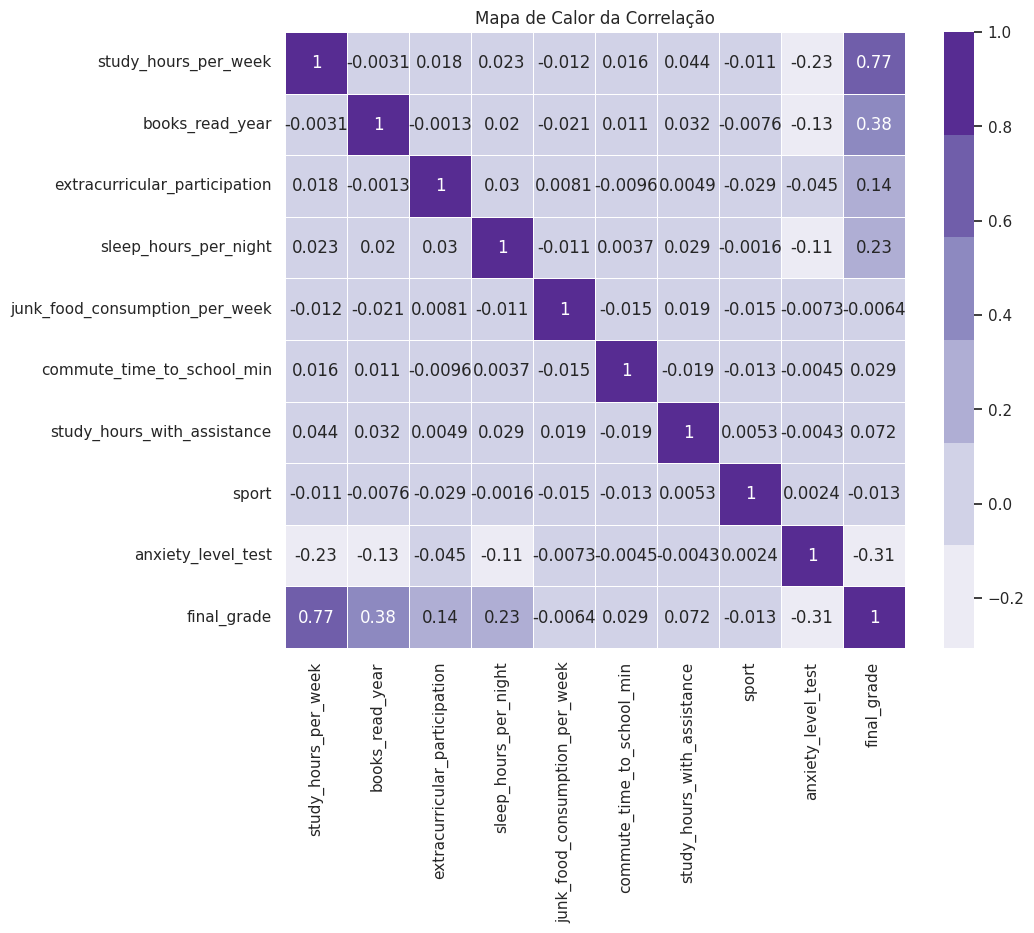

In [63]:
f, ax = plt.subplots(figsize=(10,8))
ax.set_title('Mapa de Calor da Correlação')
ax = sns.heatmap(corr, cmap=sns.color_palette("Purples"), linewidths=.5, annot=True)

Gráficos de distribuição das variáveis fortemente e moderadamente correlacionadas com a variável alvo.

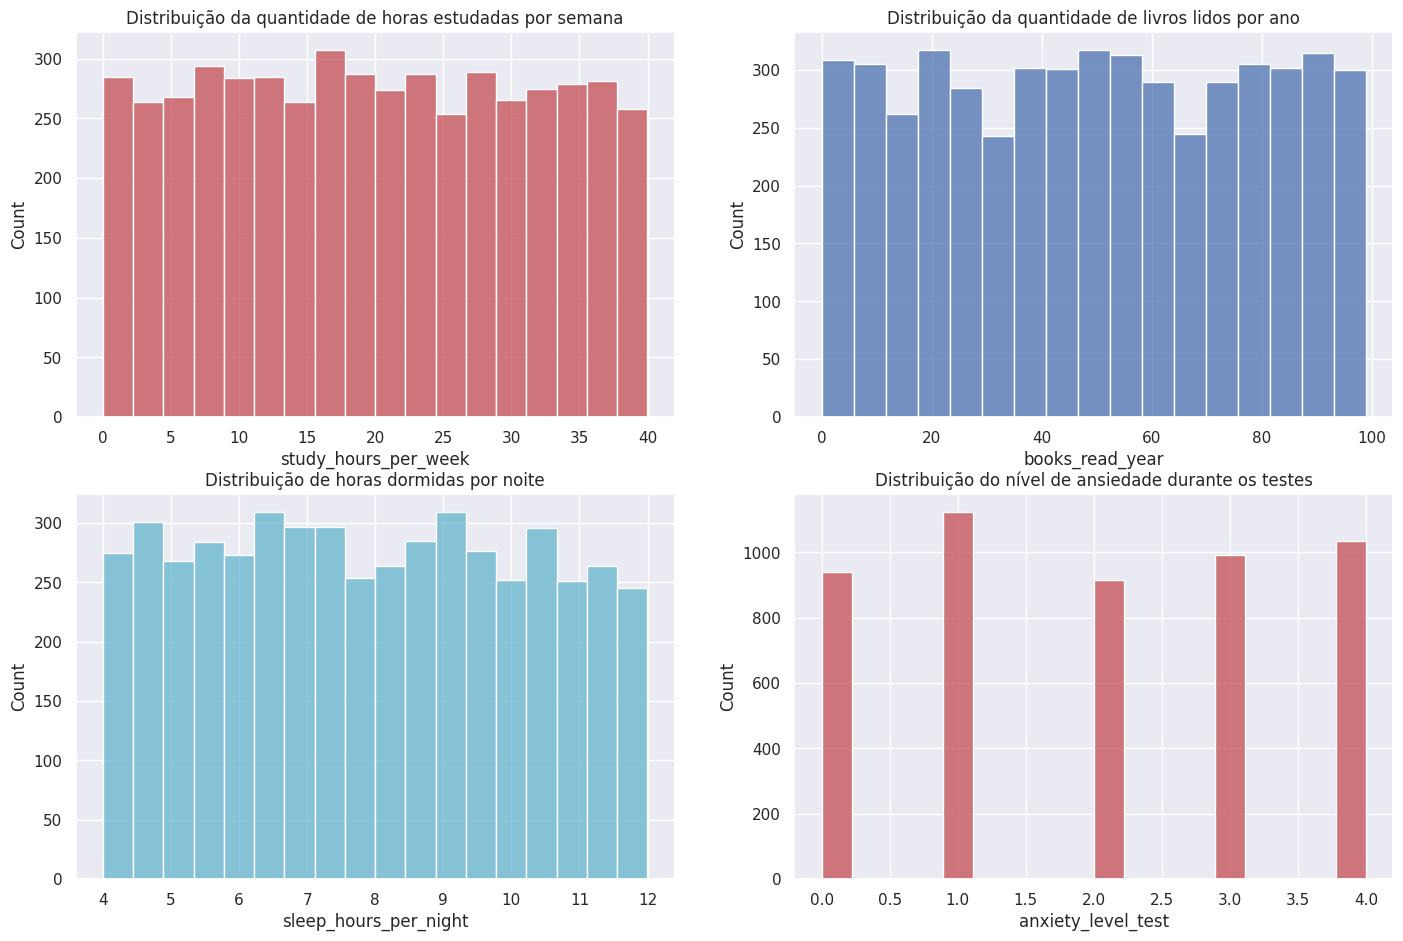

In [39]:
fig= plt.figure(figsize=(17,11))

ax=fig.add_subplot(221)
sns.histplot(df["study_hours_per_week"],color='r', ax=ax)
_ = ax.set_title('Distribuição da quantidade de horas estudadas por semana')

ax=fig.add_subplot(222)
sns.histplot(df["books_read_year"],color='b', ax=ax)
_ = ax.set_title('Distribuição da quantidade de livros lidos por ano')

ax=fig.add_subplot(223)
sns.histplot(df["sleep_hours_per_night"],color='c', ax=ax)
_ = ax.set_title('Distribuição de horas dormidas por noite')

ax=fig.add_subplot(224)
sns.histplot(df["anxiety_level_test"],color='r', ax=ax)
_ = ax.set_title('Distribuição do nível de ansiedade durante os testes')


Os histogramas a seguir ilustram a distribuição das horas de estudo por semana, a quantidade de livros lidos por ano e as horas dormidas por noite para dois grupos de alunos: aqueles com nota final igual ou superior a 70 e aqueles com nota final inferior a 70. A análise desses gráficos revela que, em geral, os alunos com notas acima de 70 dedicam mais horas ao estudo semanalmente, leem mais livros por ano e dormem mais horas por noite. Esses dados sugerem que um maior investimento em estudo, leitura e sono está associado a um melhor desempenho acadêmico.

Text(0.5, 1.0, 'Horas de estudo de alunos com nota final < 70')

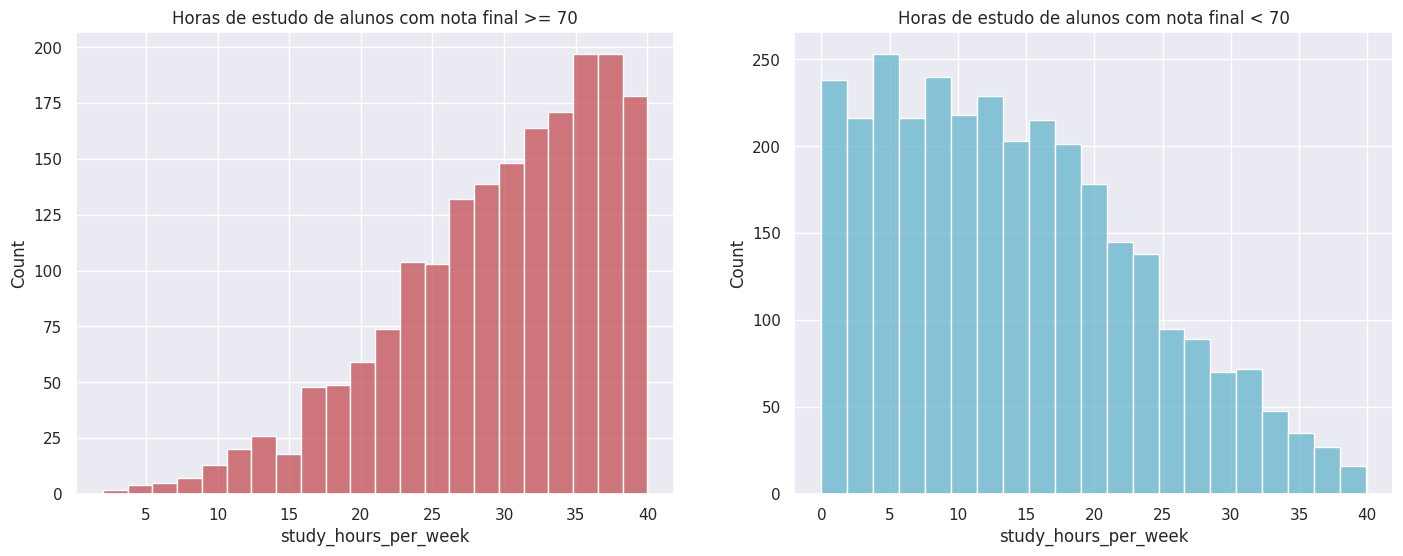

In [40]:
fig= plt.figure(figsize=(17,6))

ax=fig.add_subplot(121)
sns.histplot(df[(df.final_grade >= 70)]["study_hours_per_week"],color='r',ax=ax, edgecolor = 'w')
ax.set_title('Horas de estudo de alunos com nota final >= 70')


ax=fig.add_subplot(122)
sns.histplot(df[(df.final_grade < 70)]['study_hours_per_week'],color='c',ax=ax, edgecolor = 'w')
ax.set_title('Horas de estudo de alunos com nota final < 70')

Text(0.5, 1.0, 'Quantidade de livros lidos por ano pelos alunos com nota final < 70')

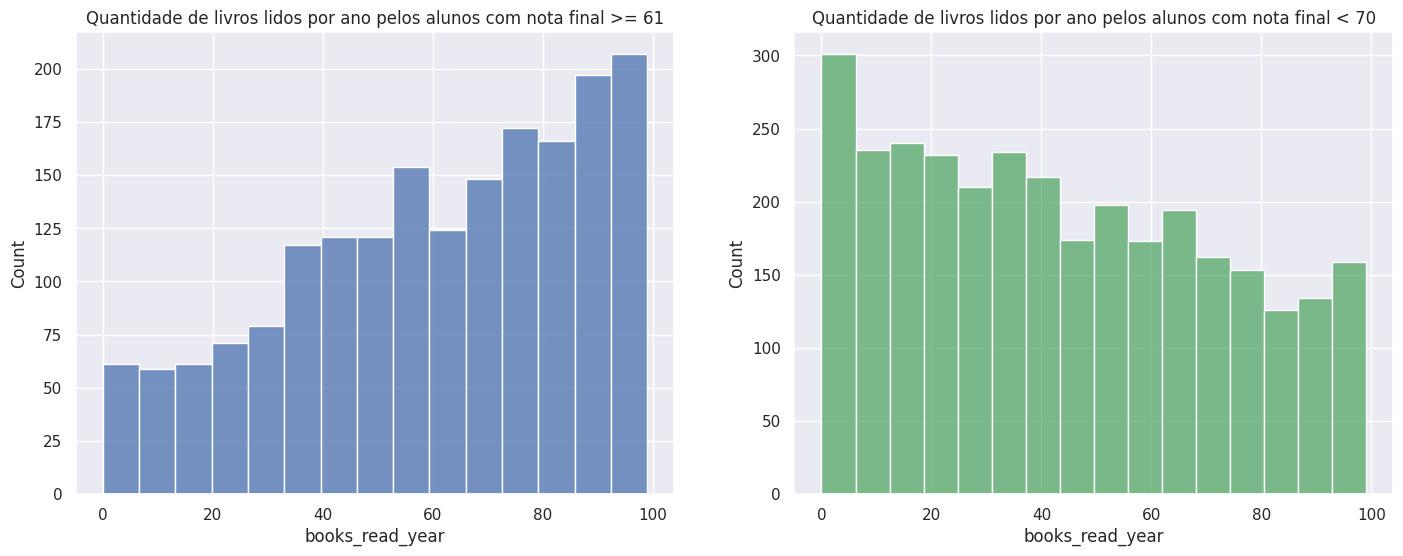

In [41]:
fig= plt.figure(figsize=(17,6))

ax=fig.add_subplot(121)
sns.histplot(df[(df.final_grade >= 70)]["books_read_year"],color='b',ax=ax, edgecolor = 'w')
ax.set_title('Quantidade de livros lidos por ano pelos alunos com nota final >= 61')


ax=fig.add_subplot(122)
sns.histplot(df[(df.final_grade < 70)]["books_read_year"],color='g',ax=ax, edgecolor = 'w')
ax.set_title('Quantidade de livros lidos por ano pelos alunos com nota final < 70')


Text(0.5, 1.0, 'Horas dormidas por noite dos alunos com nota final < 70')

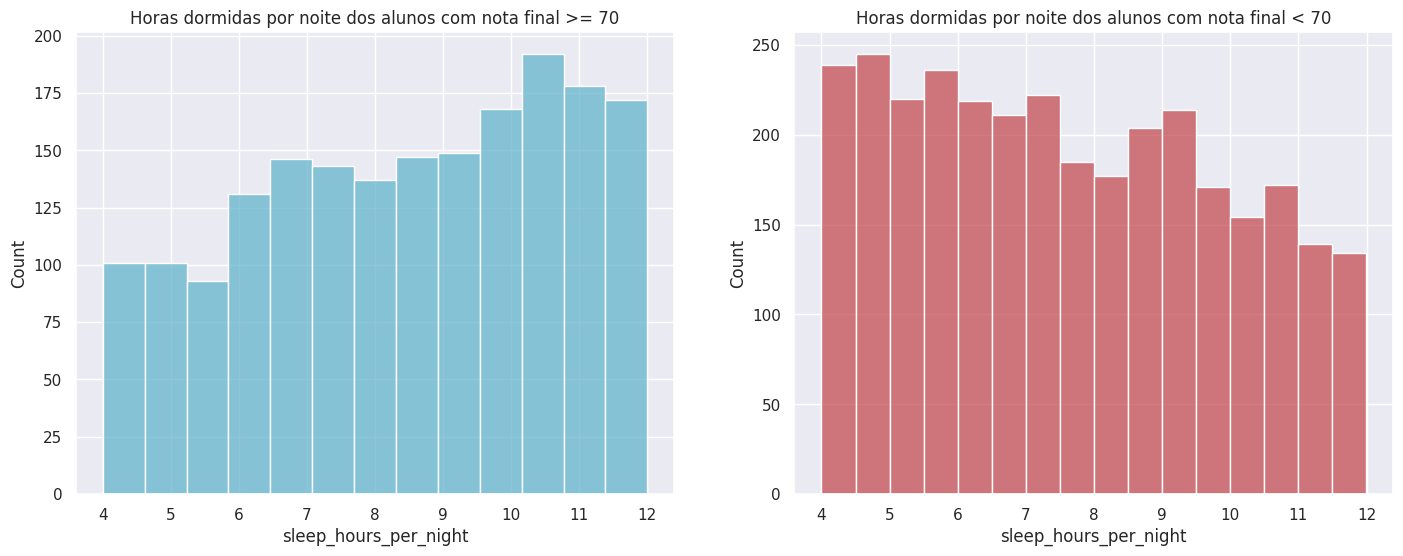

In [42]:
fig= plt.figure(figsize=(17,6))

ax=fig.add_subplot(121)
sns.histplot(df[(df.final_grade >= 70)]["sleep_hours_per_night"],color='c',ax=ax, edgecolor = 'w')
ax.set_title('Horas dormidas por noite dos alunos com nota final >= 70')


ax=fig.add_subplot(122)
sns.histplot(df[(df.final_grade < 70)]["sleep_hours_per_night"],color='r',ax=ax, edgecolor = 'w')
ax.set_title('Horas dormidas por noite dos alunos com nota final < 70')

## Funções


Função responsável por treinar um modelo de regressão linear.

In [43]:
def train_model_linear_regression(x_train, y_train):
  model = LinearRegression()
  model.fit(x_train,y_train)
  return model

Função responsável por avaliar o desempenho do modelo de regressão linear.

In [44]:
def evaluate_model(model, x_test, y_test):
  print("Informações do modelo de Regressão Linear:")
  print(f"Theta: {model.coef_}")
  print(f"Intercepto: {model.intercept_}")
  print(f"Número de features utilizadas: {model.n_features_in_}")
  print(f"Coeficiente de Determinação (R²): {model.score(x_test, y_test):.2f}")

  y_pred = model.predict(x_test)
  mse = metrics.mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  print(f'Raiz do Erro Quadrático Médio (RMSE): {rmse}')

Função responsável por realizar a validação cruzada em K partes para avaliar o desempenho do modelo de regressão linear.

In [45]:
def perform_cross_validation(model, x_train, y_train):
  kf = KFold(n_splits=5, shuffle=True, random_state=42)
  scores = cross_val_score(model, x_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
  print(f'RMSE da Validação Cruzada: {scores}')
  print(f'RMSE da Validação Cruzada (média): {scores.mean()}')

Função responsável por plotar um gráfico de resíduos em relação às previsões para avaliar a qualidade do ajuste do modelo.

In [46]:
def plot_residuals_vs_fit(model, x, y):
  y_pred = model.predict(x)
  res = y - y_pred
  plt.plot(y_pred,res,'k.',color='orange',)
  plt.axhline(y=0., color='blue', linestyle='-')
  plt.xlabel("predictions")
  plt.ylabel("residuals")


## Modelo de Regressão Linear

Treinando o modelo de Regressão Linear utilizando apenas a variável melhor correlacionada com a variável-alvo.

Informações do modelo de Regressão Linear:
Theta: [[1.4652993]]
Intercepto: [32.43263954]
Número de features utilizadas: 1
Coeficiente de Determinação (R²): 0.60
Raiz do Erro Quadrático Médio (RMSE): 13.830724700580234
---------------------------------------
RMSE da Validação Cruzada: [-13.78995843 -13.68999425 -14.14416489 -13.60529004 -13.49432498]
RMSE da Validação Cruzada (média): -13.744746518396918
---------------------------------------


<ipython-input-46-47082aa6619e>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(y_pred,res,'k.',color='orange',)


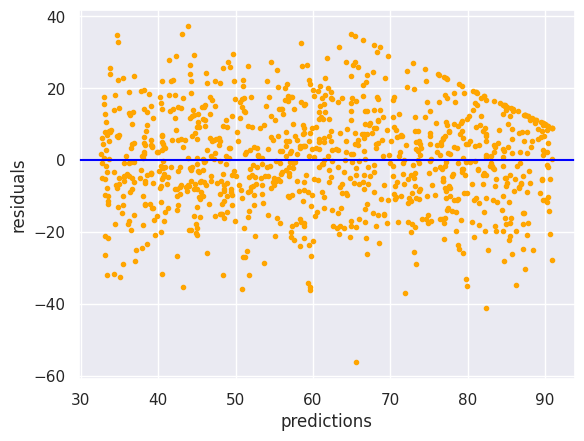

In [47]:
# Modelo 1
x = df[['study_hours_per_week']]
y = df[['final_grade']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

lr_model_1 = train_model_linear_regression(x_train, y_train)
evaluate_model(lr_model_1, x_test, y_test)

print('---------------------------------------')

perform_cross_validation(lr_model_1, x_train, y_train)
plot_residuals_vs_fit(lr_model_1, x_test, y_test)

print('---------------------------------------')

Treinando o modelo de Regressão Linear utilizando apenas as quatro variáveis melhores correlacionadas com a variável-alvo.

Informações do modelo de Regressão Linear:
Theta: [[ 1.43798946  0.27789881  1.85170486 -0.99339316]]
Intercepto: [6.4908968]
Número de features utilizadas: 4
Coeficiente de Determinação (R²): 0.79
Raiz do Erro Quadrático Médio (RMSE): 9.937434915355754
---------------------------------------
RMSE da Validação Cruzada: [-10.10808416  -9.77503979 -10.11148808 -10.01639107  -9.81222148]
RMSE da Validação Cruzada (média): -9.964644918349695
---------------------------------------


<ipython-input-46-47082aa6619e>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(y_pred,res,'k.',color='orange',)


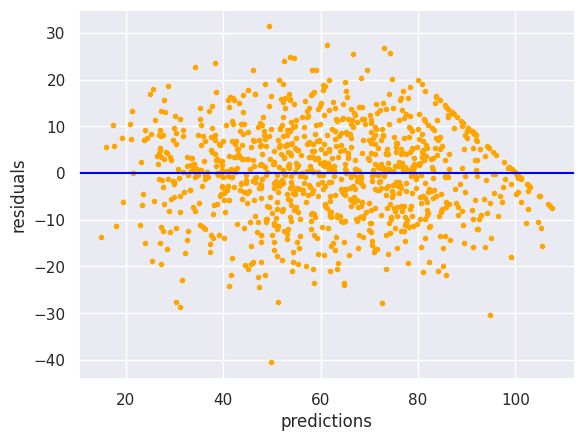

In [48]:
# Modelo 2
x = df[['study_hours_per_week', 'books_read_year', 'sleep_hours_per_night', 'anxiety_level_test']]
y = df[['final_grade']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

lr_model_2 = train_model_linear_regression(x_train, y_train)
evaluate_model(lr_model_2, x_test, y_test)

print('---------------------------------------')

perform_cross_validation(lr_model_2, x_train, y_train)
plot_residuals_vs_fit(lr_model_2, x_test, y_test)
print('---------------------------------------')

Treinando o modelo de Regressão Linear utilizando todas as variáveis do dataset.

Informações do modelo de Regressão Linear:
Theta: [ 1.43247113  0.27852371  5.14194392  1.80820573  0.04171147  0.04027769
  0.03214468  0.02994126 -0.92316229]
Intercepto: 2.181187232035576
Número de features utilizadas: 9
Coeficiente de Determinação (R²): 0.80
Raiz do Erro Quadrático Médio (RMSE): 9.67875633256547
---------------------------------------
RMSE da Validação Cruzada: [-9.85919259 -9.30329252 -9.89568577 -9.72912523 -9.32321687]
RMSE da Validação Cruzada (média): -9.622102596260977
---------------------------------------


<ipython-input-46-47082aa6619e>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  plt.plot(y_pred,res,'k.',color='orange',)


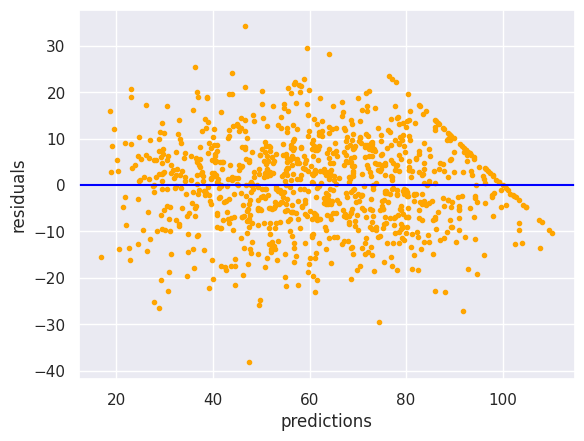

In [49]:
# Modelo 3
x = df.drop(['final_grade'], axis = 1)
y = df.final_grade

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

lr_model_3 = train_model_linear_regression(x_train, y_train)
evaluate_model(lr_model_3, x_test, y_test)

print('---------------------------------------')

perform_cross_validation(lr_model_3, x_train, y_train)
plot_residuals_vs_fit(lr_model_3, x_test, y_test)
print('---------------------------------------')

Três modelos foram desenvolvidos para prever o desempenho acadêmico dos estudantes, avaliados com base no coeficiente de determinação (R²) e no RMSE (Raiz do Erro Quadrático Médio):

* Modelo 1: Considera apenas a variável mais correlacionada com o desempenho acadêmico, que é o tempo de estudo semanal. Com um R² de 0,60, ele explica 60% da variação nas notas finais. No entanto, o RMSE de 13,83 indica um erro relativamente alto, sugerindo que essa única variável não é suficiente para previsões precisas.

* Modelo 2: Utiliza as quatro variáveis com melhor correlação com o desempenho acadêmico: horas de estudo por semana, número de livros lidos por ano, horas de sono por noite e nível de ansiedade. O R² aumentou significativamente para 0,79, explicando uma parcela maior da variação no desempenho. O RMSE também diminuiu para 9,93, mostrando uma redução substancial no erro em comparação com o Modelo 1.

* Modelo 3: Considera todas as nove variáveis disponíveis no conjunto de dados. O R² aumentou ligeiramente para 0,80, enquanto o RMSE caiu para 9,67, revelando um pequeno ganho em relação ao Modelo 2.

Embora o Modelo 3 tenha apresentado uma ligeira melhora nos indicadores, o ganho em precisão foi pequeno comparado ao Modelo 2. Isso sugere que a inclusão de mais variáveis não resultou em uma melhoria significativa no desempenho preditivo, tornando o Modelo 2 uma escolha mais eficiente e simplificada para prever o desempenho acadêmico.

## Modelo de Regressão Lasso

Com o objetivo de obter o melhor subconjunto de variáveis, foi implementado um modelo que utiliza a técnica de regressão Lasso. Essa técnica aplica uma penalização aos coeficientes das variáveis, forçando alguns deles a serem zerados. Isso não apenas simplifica o modelo, mas também ajuda a identificar quais variáveis são verdadeiramente relevantes para a previsão da variável alvo.



Os resultados mostram que o modelo de regressão Lasso selecionou um subconjunto de variáveis com coeficientes variados, destacando a importância de fatores como sleep_hours_per_night e extracurricular_participation para a previsão. Com um RMSE de 9,68 e um R² de 0,80, o modelo explica 80% da variabilidade na variável alvo, o que indica que a sua precisão é comparável à dos modelos 2 e 3 vistos anteriormente.

In [50]:
x = df.drop(['final_grade'], axis = 1)
y = df.final_grade

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

lasso_model = LassoCV(cv=5, random_state=0)
lasso_model.fit(x_train, y_train)

mse = mean_squared_error(y_test, lasso_model.predict(x_test))
print('Coeficientes das variáveis: ', list(zip(lasso_model.coef_, x)))
print('Melhor valor de lambda escolhido por validação cruzada:', lasso_model.alpha_)
print('Raiz do Erro Quadrático Médio (RMSE):', np.sqrt(mse))
print(f"Coeficiente de Determinação (R²): {lasso_model.score(x_test, y_test):.2f}")


Melhor subconjunto de atributos:  [(1.4348284035959336, 'study_hours_per_week'), (0.2788108810357444, 'books_read_year'), (4.219136248063027, 'extracurricular_participation'), (1.7776587066343987, 'sleep_hours_per_night'), (0.03539009259297818, 'junk_food_consumption_per_week'), (0.03171256196516938, 'commute_time_to_school_min'), (0.031574194347533314, 'study_hours_with_assistance'), (-0.8219557211476558, 'anxiety_level_test')]
Melhor valor de lambda escolhido por validação cruzada: 0.23335633306875
Raiz do Erro Quadrático Médio (RMSE): 9.676515757350131
Coeficiente de Determinação (R²): 0.80
